In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# read previously created csv file into datframe
# k means works better with symmetrically distributed variables
rfm = pd.read_csv('C:\\Users\\phili\\Documents\\Downloads\\BrazilCapstone\\rfm.csv')

In [3]:
rfm.head()

,Unnamed: 0,Customer ID,Order_Id_x,Order Date,Price_x,customer_state,recency,frequency,monetary
0,0,7ac26eac431c6848694a2de6f0327524,00125cb692d04887809806618a2a145f,2017-03-23,109.9,GO,529,1,109.9
1,1,106106992030e0d83e6f1bc9d4054070,00571ded73b3c061925584feab0db425,2017-05-18,179.9,MG,473,1,179.9
2,2,fd01a8dd276ac93aec73fde385389de9,006dd93155bc2abd844cc5eed3a0fe7f,2017-12-02,49.9,SP,275,1,49.9
3,3,1d74273c053909be057f50f65b48522f,00946f674d880be1f188abc10ad7cf46,2017-12-09,99.9,SP,268,1,99.9
4,4,c7e193525b2825ccfe5c65875c0db1dc,00a0116ff15ff973ea16bee881208ae7,2018-02-18,149.0,MS,197,1,149.0


In [4]:
rfm = rfm[['Customer ID', 'Order Date', 'recency', 'frequency', 'monetary']]
print(rfm.head())

                        Customer ID  Order Date  recency  frequency  monetary
0  7ac26eac431c6848694a2de6f0327524  2017-03-23      529          1     109.9
1  106106992030e0d83e6f1bc9d4054070  2017-05-18      473          1     179.9
2  fd01a8dd276ac93aec73fde385389de9  2017-12-02      275          1      49.9
3  1d74273c053909be057f50f65b48522f  2017-12-09      268          1      99.9
4  c7e193525b2825ccfe5c65875c0db1dc  2018-02-18      197          1     149.0


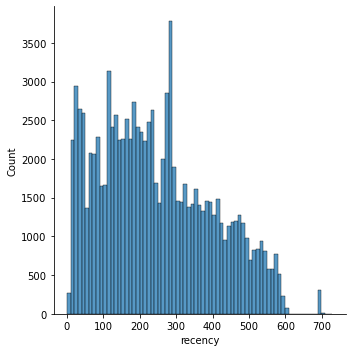

In [5]:
# distribution plot of recency
ax = sns.displot(rfm['recency'])

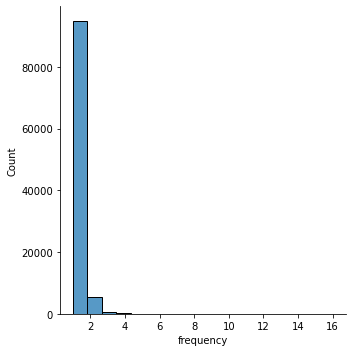

In [6]:
# distribution plot of frequency
ax = sns.displot(rfm['frequency'])

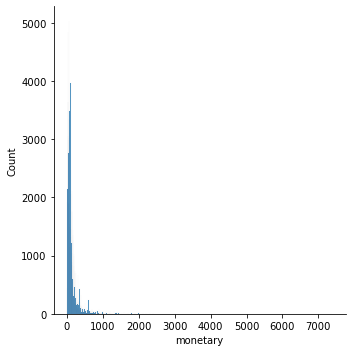

In [7]:
# distribution plot of monetary
ax = sns.displot(rfm['monetary'])

The plots for the 3 rfm factors reveal that frequency and monetary value are heavily skewed to the right, lower frequencies and smaller amounts of money being spent.  Recency is skewed to the right as while but not nearly as much as the other two factors. I will create quantiles and score the data to make further observations.

In [8]:
# Create column
rfm['r'] = pd.qcut(rfm['recency'], q=5, labels=[5, 4, 3, 2, 1])
rfm['f'] = pd.qcut(rfm['frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
rfm['m'] = pd.qcut(rfm['monetary'], q=5, labels=[1, 2, 3, 4, 5])

In [9]:
rfm.head()

,Customer ID,Order Date,recency,frequency,monetary,r,f,m
0,7ac26eac431c6848694a2de6f0327524,2017-03-23,529,1,109.9,1,1,4
1,106106992030e0d83e6f1bc9d4054070,2017-05-18,473,1,179.9,1,1,5
2,fd01a8dd276ac93aec73fde385389de9,2017-12-02,275,1,49.9,3,1,2
3,1d74273c053909be057f50f65b48522f,2017-12-09,268,1,99.9,3,1,3
4,c7e193525b2825ccfe5c65875c0db1dc,2018-02-18,197,1,149.0,3,1,4


In [10]:
# Create rfm score column
rfm['rfm_score'] = rfm['r'].astype(int) + rfm['f'].astype(int) + rfm['m'].astype(int)
                            
rfm.head()

,Customer ID,Order Date,recency,frequency,monetary,r,f,m,rfm_score
0,7ac26eac431c6848694a2de6f0327524,2017-03-23,529,1,109.9,1,1,4,6
1,106106992030e0d83e6f1bc9d4054070,2017-05-18,473,1,179.9,1,1,5,7
2,fd01a8dd276ac93aec73fde385389de9,2017-12-02,275,1,49.9,3,1,2,6
3,1d74273c053909be057f50f65b48522f,2017-12-09,268,1,99.9,3,1,3,7
4,c7e193525b2825ccfe5c65875c0db1dc,2018-02-18,197,1,149.0,3,1,4,8
